# Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

* Seaborn: https://seaborn.pydata.org/
* Tutorials: https://seaborn.pydata.org/tutorial.html#tutorial

## Introduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set()
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Distribution Plot

We may use the `distplot` function to draw the distribution of input data. Important parameters are:

* `a`: The observed data.
* `hist`: It specifies whether to draw histogram of the input data.
* `kde`: It specifies whether to draw kernel density of the input data.

**NB.** In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.

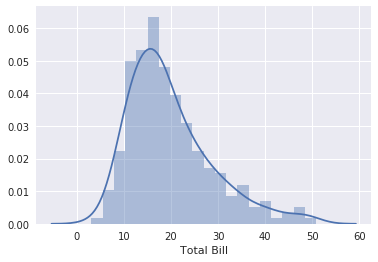

In [5]:
d = sns.distplot(tips['total_bill'], bins=20, axlabel='Total Bill')

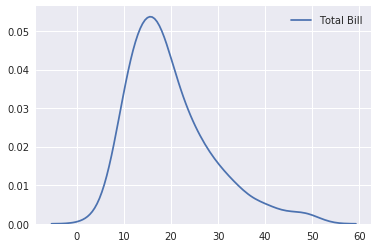

In [6]:
k = sns.kdeplot(tips['total_bill'], legend=False)
k.legend(['Total Bill'])

Alternatively, we may apply the `rugplot` function to show how densely the points are distributed.

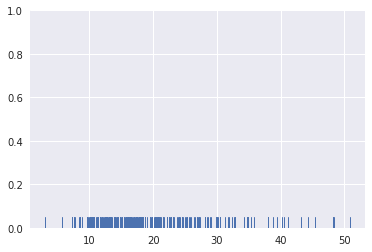

In [7]:
sns.rugplot(tips['total_bill'], axis='x')

### Joint Plot between Variables

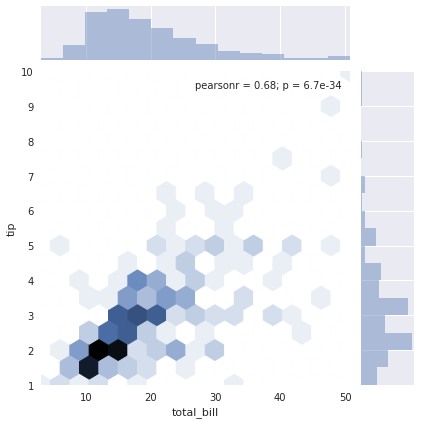

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

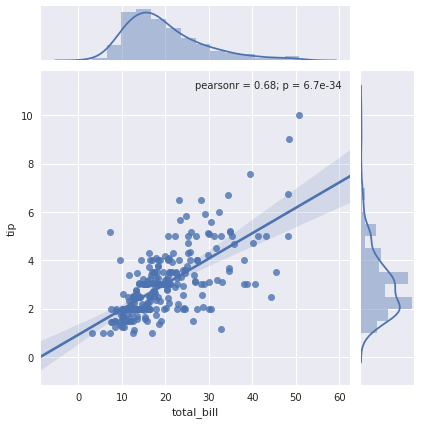

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

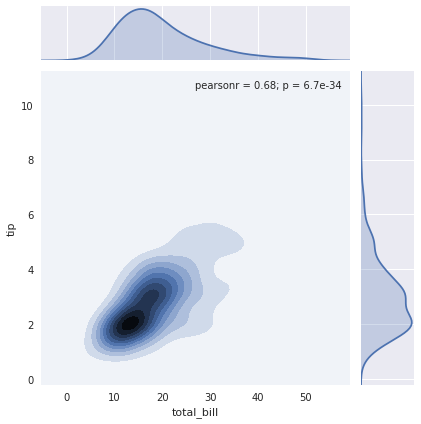

In [10]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

### Pair Plot

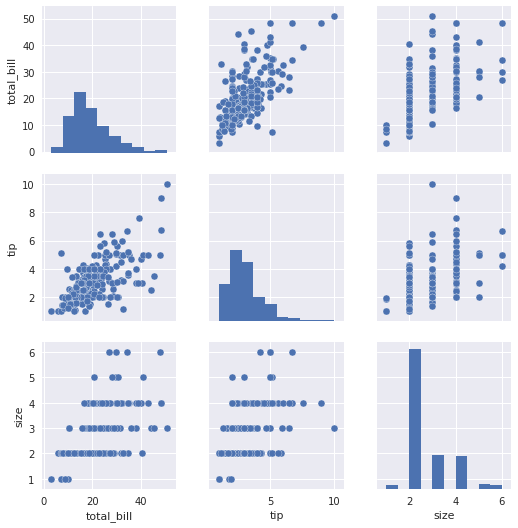

In [11]:
sns.pairplot(tips)

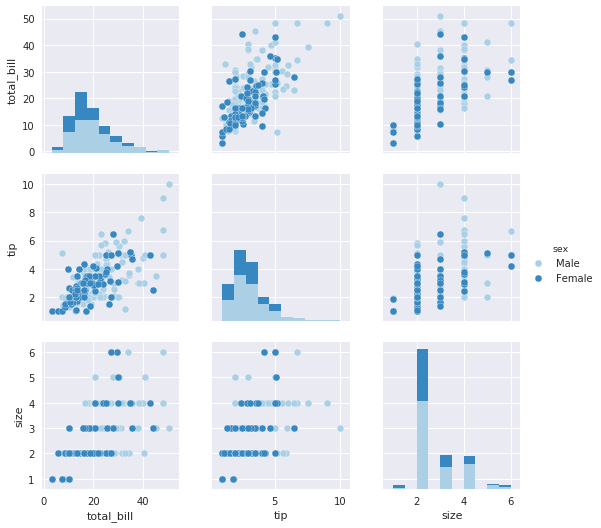

In [12]:
sns.pairplot(tips, hue='sex', palette='Blues')

### Count Plot

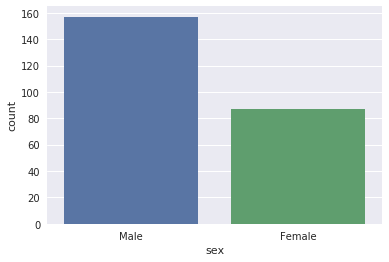

In [13]:
sns.countplot(x='sex', data=tips)

### Bar Plot

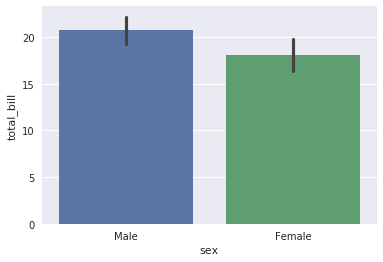

In [14]:
b = sns.barplot(x='sex', y='total_bill', data=tips)

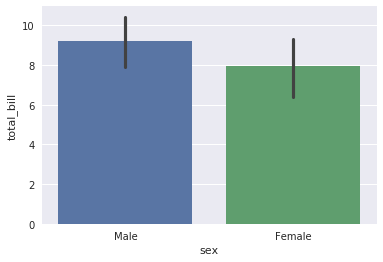

In [15]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

### Box Plot

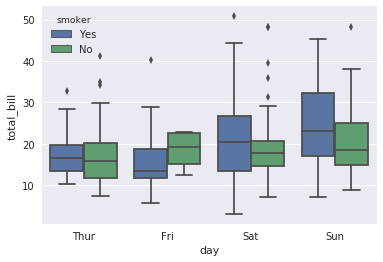

In [16]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

### Violin Plot

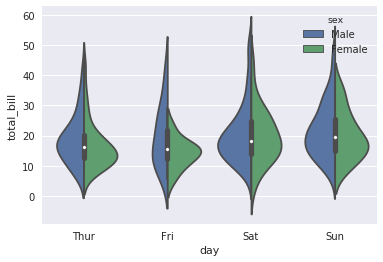

In [17]:
sns.violinplot(x='day', y='total_bill', data=tips, 
               hue='sex', split=True)

### Strip Plot

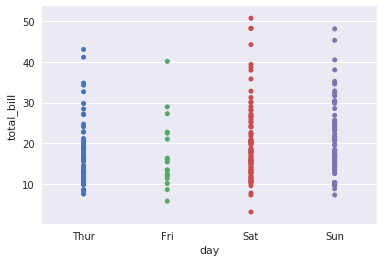

In [18]:
sns.stripplot(x='day', y='total_bill', data=tips)

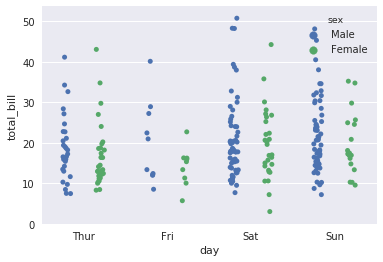

In [19]:
sns.stripplot(x='day', y='total_bill', 
              data=tips, jitter=True, 
              hue='sex', dodge=True)  # dodge => split

### Swarmplot

It is somehow a combination of strip and violin plot. It is not a good idea to apply swarm plot for huge datasets

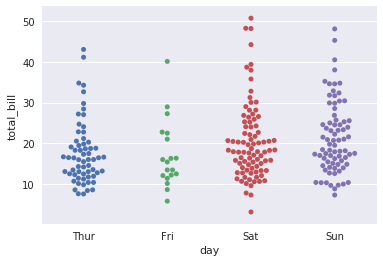

In [20]:
sns.swarmplot(x='day', y='total_bill', data=tips)

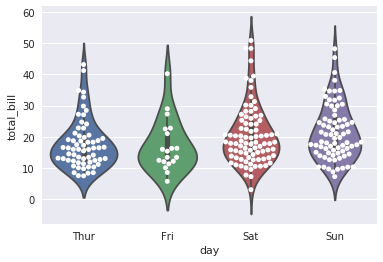

In [21]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='white')

### Factor Plot

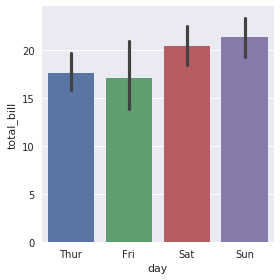

In [22]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar')

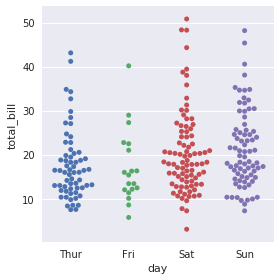

In [23]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='swarm')

### Matrix Plots

In [24]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [25]:
pv_tab = flights.pivot_table(index='month', columns='year', values='passengers')
pv_tab

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


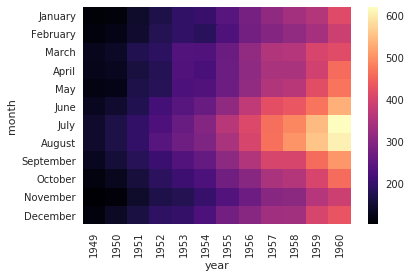

In [26]:
sns.heatmap(pv_tab, cmap='magma')

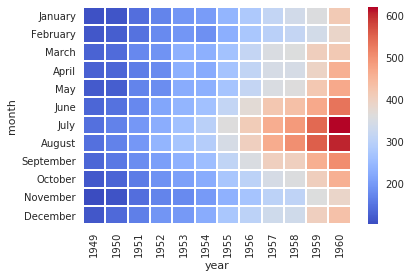

In [27]:
sns.heatmap(pv_tab, cmap='coolwarm', 
            linecolor='white', linewidth=1)

To cluster similar months, one may use the `clustermap` function.

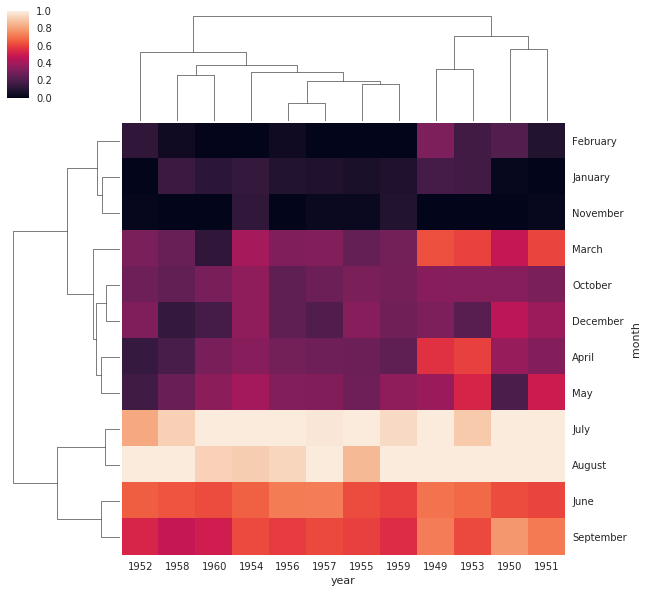

In [28]:
sns.clustermap(pv_tab, standard_scale=1)

## Grids

In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

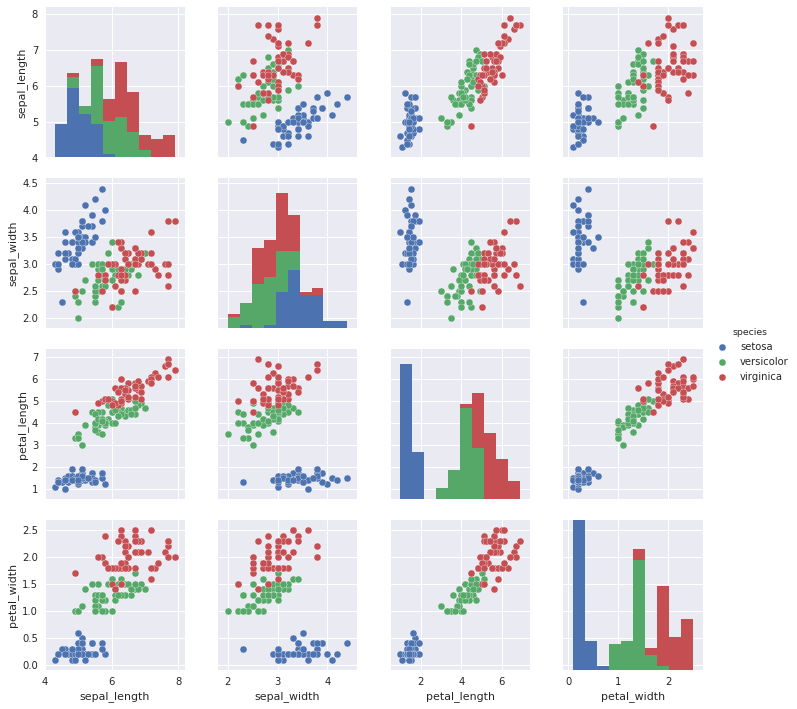

In [31]:
sns.pairplot(iris, hue='species')

### Pair Grid

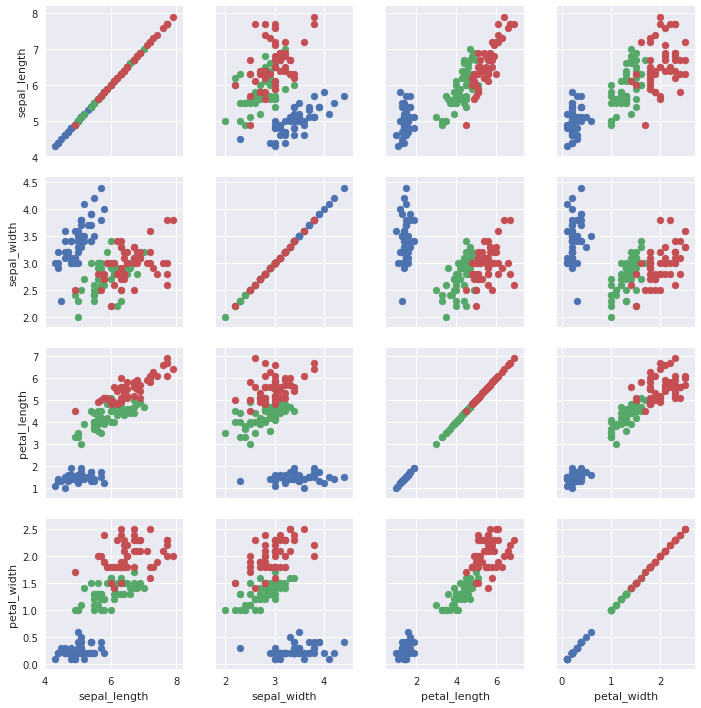

In [32]:
g = sns.PairGrid(iris, hue='species')
g.map(plt.scatter)

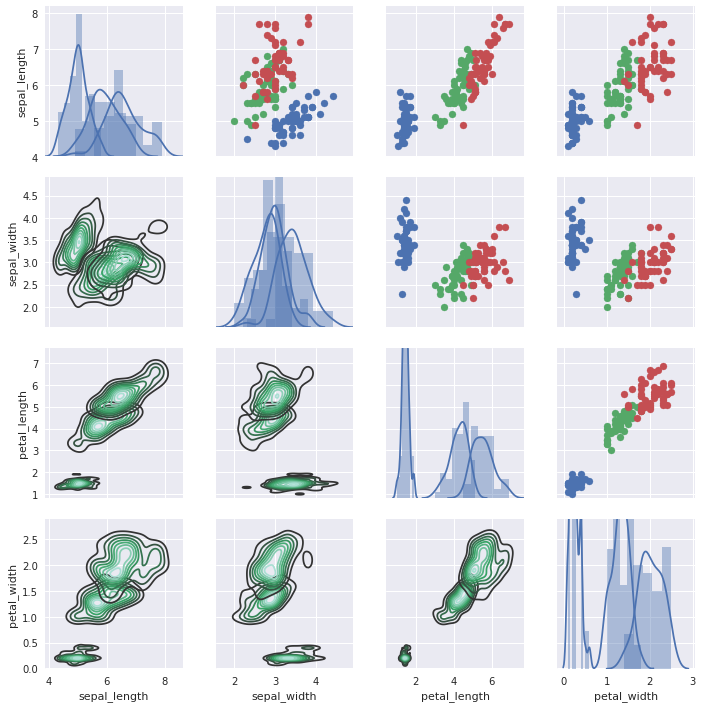

In [33]:
g = sns.PairGrid(iris, hue='species')
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### Facet Grid

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


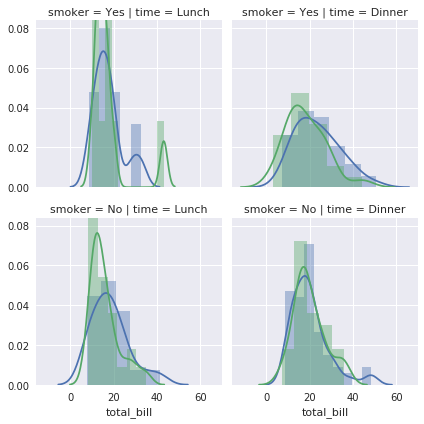

In [35]:
g = sns.FacetGrid(data=tips, col='time', row='smoker', hue='sex')
g.map(sns.distplot, 'total_bill')

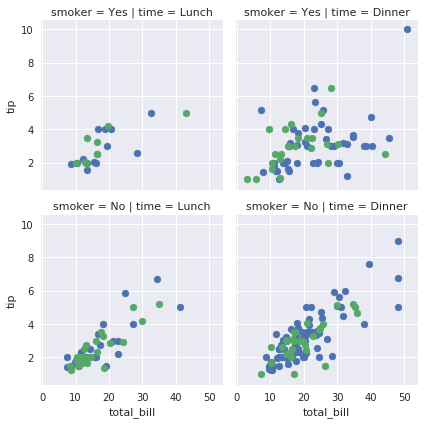

In [36]:
g = sns.FacetGrid(data=tips, col='time', row='smoker', hue='sex')
g.map(plt.scatter, 'total_bill', 'tip')

---

### Regression Plot

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


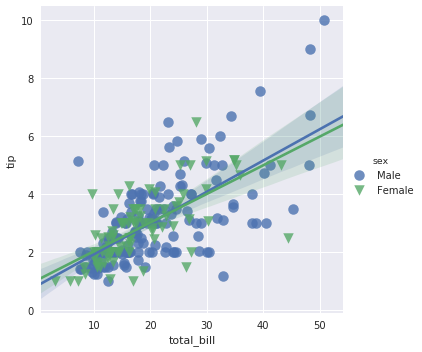

In [38]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', 
           markers=['o', 'v'], scatter_kws={'s': 110}, size=5)

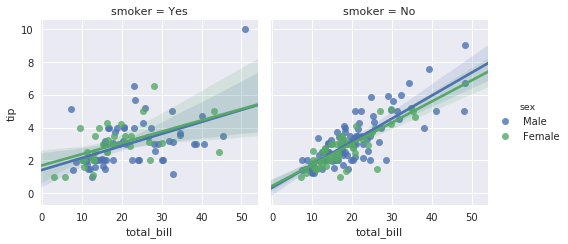

In [47]:
sns.lmplot(x='total_bill', y='tip', data=tips, 
           hue='sex', col='smoker', size=3.5)

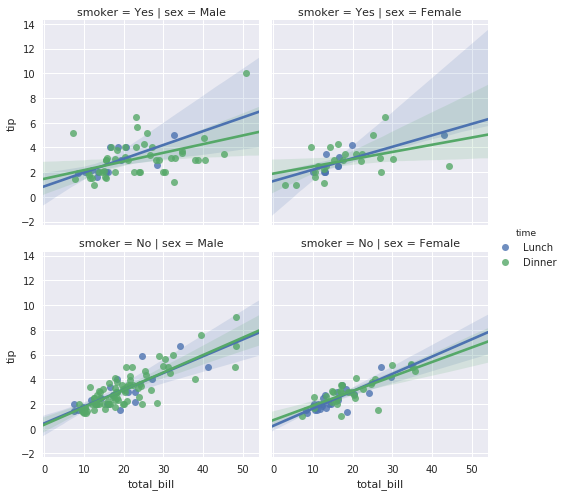

In [46]:
sns.lmplot(x='total_bill', y='tip', data=tips, 
           hue='time', col='sex', row='smoker', size=3.5)

aspect = width/height

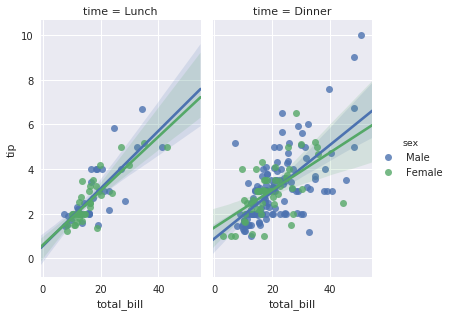

In [48]:
sns.lmplot(x='total_bill', y='tip', data=tips, 
           col='time', hue='sex', aspect=0.6, size=4.5)